<a href="https://colab.research.google.com/github/Maspie/Machine-Learning-codes/blob/main/Naive_Bayes%2CLog_regression%2C_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [25]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]

df = pd.read_csv("/content/magic04.data", names=cols)

df.head(10)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
6,48.2468,17.3565,3.0332,0.2529,0.1515,8.5730,38.0957,10.5868,4.7920,219.0870,g
7,26.7897,13.7595,2.5521,0.4236,0.2174,29.6339,20.4560,-2.9292,0.8120,237.1340,g
8,96.2327,46.5165,4.1540,0.0779,0.0390,110.3550,85.0486,43.1844,4.8540,248.2260,g
9,46.7619,15.1993,2.5786,0.3377,0.1913,24.7548,43.8771,-6.6812,7.8750,102.2510,g


In [26]:
df["class"].unique() #gives unique values in the column

array(['g', 'h'], dtype=object)

In [27]:
#we gotta convert this g and h into numeric so it will be easier for computer to understand
df["class"] = (df["class"] == "g").astype(int) #if its equal g it will be 1 else 0

In [28]:
df["class"]


0        1
1        1
2        1
3        1
4        1
        ..
19015    0
19016    0
19017    0
19018    0
19019    0
Name: class, Length: 19020, dtype: int64

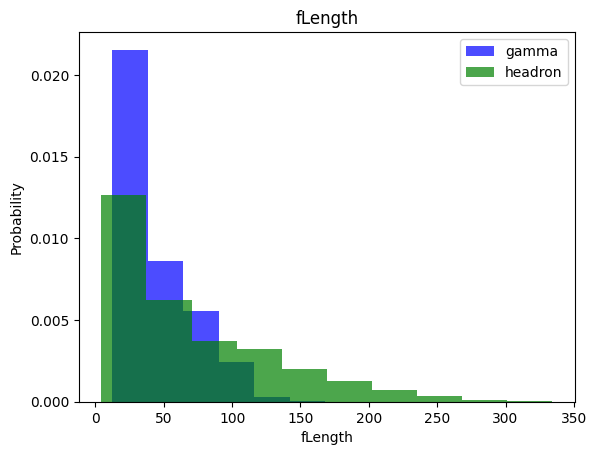

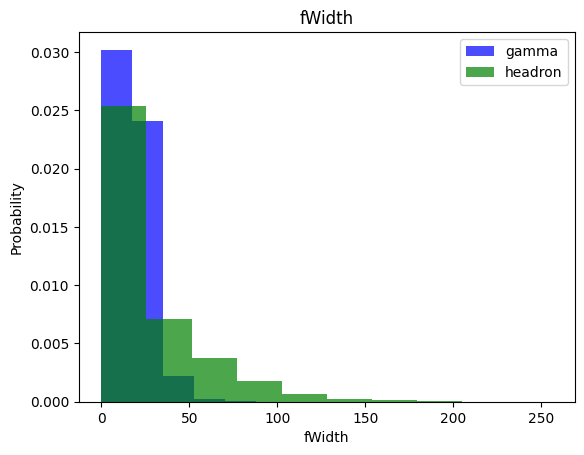

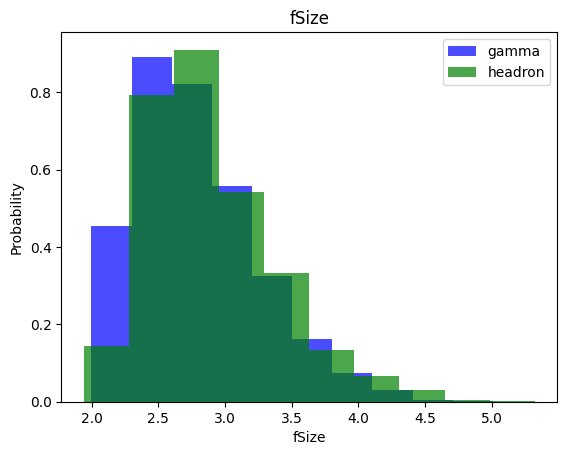

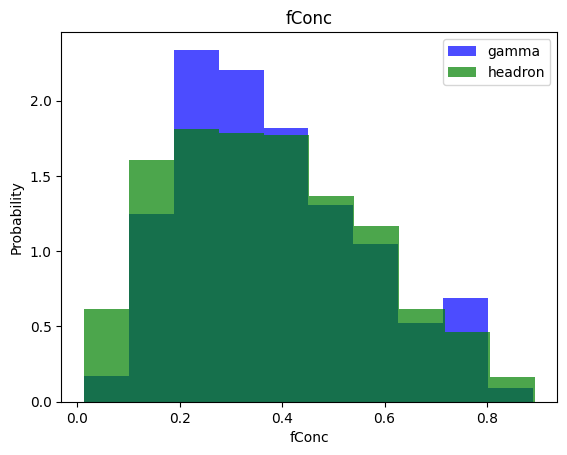

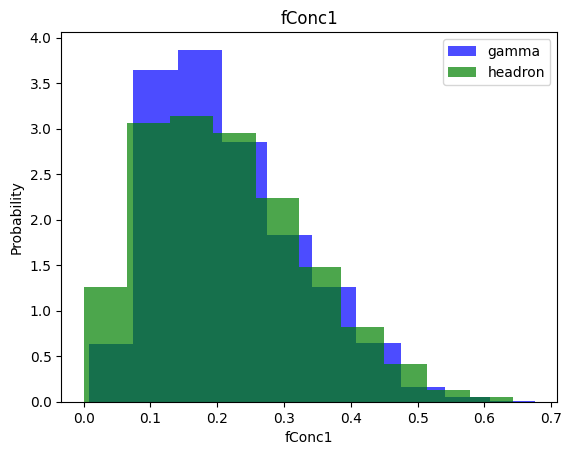

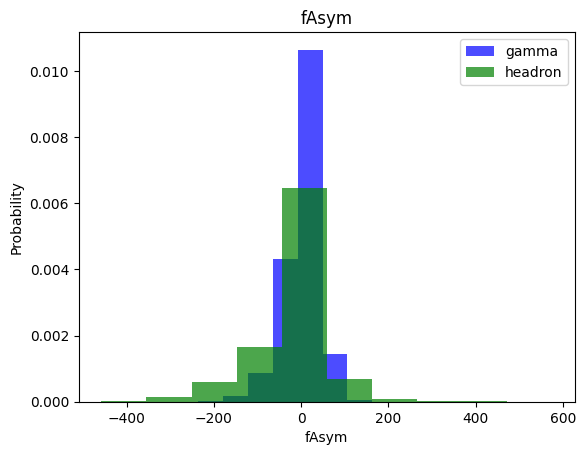

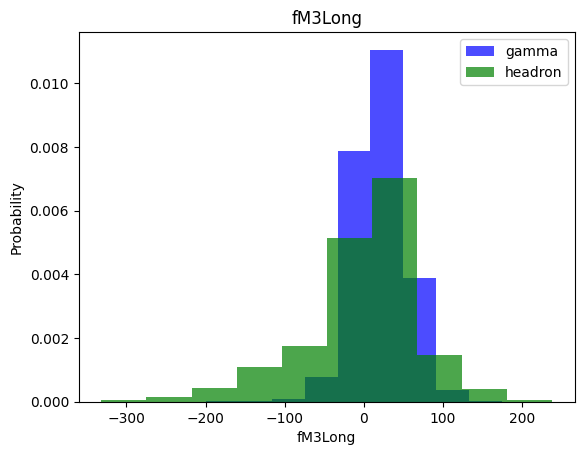

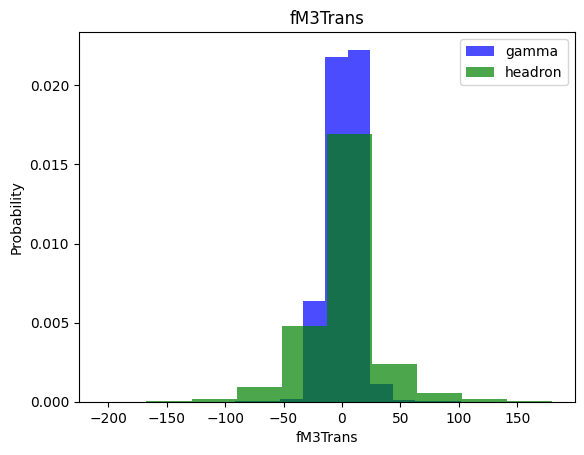

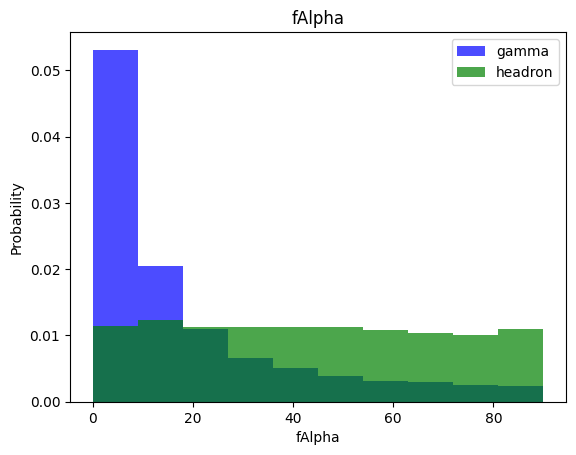

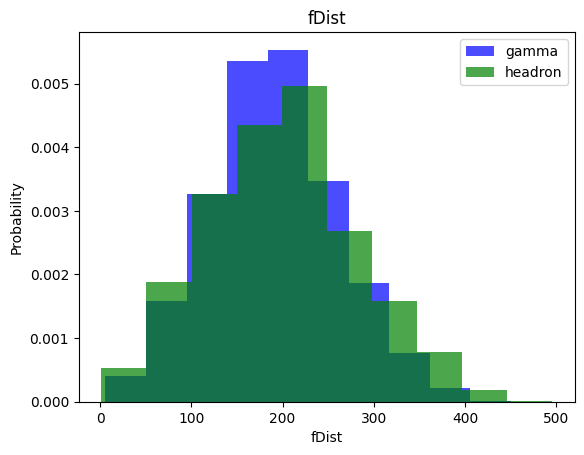

In [29]:
#going through all the labels
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color = 'blue', label = 'gamma', alpha = 0.7, density = True) #inside this dataframe get me everything where class = 1
  plt.hist(df[df["class"]==0][label], color = 'green', label = 'headron', alpha = 0.7, density = True) #inside this dataframe get me everything where class = 1
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()
#alpha is transparency, density being true normalizes


In [30]:
  X = df[df.columns[:-1]].values
  y = df[df.columns[-1]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)




KNN

In [31]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred = knn_model.predict(X_test)

In [33]:
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [34]:
y_test


array([0, 1, 1, ..., 1, 1, 0])

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.61      0.70      1344
           1       0.81      0.93      0.87      2460

    accuracy                           0.82      3804
   macro avg       0.82      0.77      0.79      3804
weighted avg       0.82      0.82      0.81      3804



Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

In [37]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [38]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.38      0.49      1344
           1       0.73      0.92      0.81      2460

    accuracy                           0.73      3804
   macro avg       0.72      0.65      0.65      3804
weighted avg       0.72      0.73      0.70      3804




We are getting worse scores for NB


Logistic Regression



In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.59      0.66      1344
           1       0.80      0.89      0.84      2460

    accuracy                           0.79      3804
   macro avg       0.78      0.74      0.75      3804
weighted avg       0.78      0.79      0.78      3804



Performs slightly better than NB but not as good as KNN

Support Vector Machine-
Not robust to the outliers


In [44]:
from sklearn.svm import SVC


In [47]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [49]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.59      0.71      1344
           1       0.81      0.96      0.88      2460

    accuracy                           0.83      3804
   macro avg       0.85      0.77      0.79      3804
weighted avg       0.84      0.83      0.82      3804

